In [ ]:
# PART 1

In [2]:
# Turn a video into basic components of pixels

import cv2
import numpy as np

def video_to_color_matrices(video_path):
    '''
    Converting each frame of a video into a list of matrixes of pixel color (list)
    '''
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    frame_matrices = []
    
    # Make sure each frame is read successfully
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Append the frame matrix to the list (which is a list of matrixes of 3-tuples for each pixel)
        frame_matrices.append(frame)

    # Release the video capture object and close all OpenCV windows
    cap.release()
    cv2.destroyAllWindows()
    
    return frame_matrices

# Input
video_path = "Speed_climbing_Highlights_from_Shanghai_1_winner.mp4"
frame_matrices_Speed_climbing_Highlights_from_Shanghai_1_winner = video_to_color_matrices(video_path)
video_path = "Speed_climbing_Highlights_from_Shanghai_1_loser.mp4"
frame_matrices_Speed_climbing_Highlights_from_Shanghai_1_loser = video_to_color_matrices(video_path)
video_path = "Speed_climbing_Highlights_from_Shanghai_2_winner.mp4"
frame_matrices_Speed_climbing_Highlights_from_Shanghai_2_winner = video_to_color_matrices(video_path)
video_path = "Speed_climbing_Highlights_from_Shanghai_2_loser.mp4"
frame_matrices_Speed_climbing_Highlights_from_Shanghai_2_loser = video_to_color_matrices(video_path)
video_path = "Speed_climbing_Highlights_from_Shanghai_3_winner.mp4"
frame_matrices_Speed_climbing_Highlights_from_Shanghai_3_winner = video_to_color_matrices(video_path)
video_path = "Speed_climbing_Highlights_from_Shanghai_3_loser.mp4"
frame_matrices_Speed_climbing_Highlights_from_Shanghai_3_loser = video_to_color_matrices(video_path)
video_path = "Speed_climbing_Highlights_from_Shanghai_4_winner.mp4"
frame_matrices_Speed_climbing_Highlights_from_Shanghai_4_winner = video_to_color_matrices(video_path)
video_path = "Speed_climbing_Highlights_from_Shanghai_4_loser.mp4"
frame_matrices_Speed_climbing_Highlights_from_Shanghai_4_loser = video_to_color_matrices(video_path)
video_path = "Speed_climbing_Highlights_from_Shanghai_5_winner.mp4"
frame_matrices_Speed_climbing_Highlights_from_Shanghai_5_winner = video_to_color_matrices(video_path)
video_path = "Speed_climbing_Highlights_from_Shanghai_5_loser.mp4"
frame_matrices_Speed_climbing_Highlights_from_Shanghai_5_loser = video_to_color_matrices(video_path)

In [39]:
video_path = "LIVE_Speed_Climbing_Finals_1_winner.mp4"
frame_matrices_LIVE_Speed_Climbing_Finals_1_winner = video_to_color_matrices(video_path)
video_path = "LIVE_Speed_Climbing_Finals_1_loser.mp4"
frame_matrices_LIVE_Speed_Climbing_Finals_1_loser = video_to_color_matrices(video_path)
video_path = "LIVE_Speed_Climbing_Finals_2_winner.mp4"
frame_matrices_LIVE_Speed_Climbing_Finals_2_winner = video_to_color_matrices(video_path)
video_path = "LIVE_Speed_Climbing_Finals_2_loser.mp4"
frame_matrices_LIVE_Speed_Climbing_Finals_2_loser = video_to_color_matrices(video_path)
video_path = "LIVE_Speed_Climbing_Finals_3_winner.mp4"
frame_matrices_LIVE_Speed_Climbing_Finals_3_winner = video_to_color_matrices(video_path)
video_path = "LIVE_Speed_Climbing_Finals_3_loser.mp4"
frame_matrices_LIVE_Speed_Climbing_Finals_3_loser = video_to_color_matrices(video_path)
video_path = "LIVE_Speed_Climbing_Finals_4_winner.mp4"
frame_matrices_LIVE_Speed_Climbing_Finals_4_winner = video_to_color_matrices(video_path)
video_path = "LIVE_Speed_Climbing_Finals_4_loser.mp4"
frame_matrices_LIVE_Speed_Climbing_Finals_4_loser = video_to_color_matrices(video_path)
video_path = "LIVE_Speed_Climbing_Finals_5_winner.mp4"
frame_matrices_LIVE_Speed_Climbing_Finals_5_winner = video_to_color_matrices(video_path)
video_path = "LIVE_Speed_Climbing_Finals_5_loser.mp4"
frame_matrices_LIVE_Speed_Climbing_Finals_5_loser = video_to_color_matrices(video_path)

In [55]:
video_path = "Aleksandra Miroslaw at Tokyo 2020... Literally spiderwoman. cropped.mp4"
frame_matrices_World_Record_Speed = video_to_color_matrices(video_path)

In [146]:
# Reduce the number of pixels to make it faster -> ne fonctionne pas (moins bien)

In [ ]:
# Labeling using k-means

import cv2
import numpy as np
from sklearn.cluster import KMeans

def label_frames_kmeans(frame_matrices, n_clusters):
    '''
    Second method using k-means on colors
    '''
    labeled_matrices = []

    for frame in frame_matrices:
        # Reshape frame to a 2D array of pixels and 3 color values (RGB) with -1 being the original value
        pixels = frame.reshape((-1, 3))
        
        # Apply KMeans clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(pixels)
        labels = kmeans.labels_
        
        # Reshape labels to the original frame shape
        labeled_frame = labels.reshape(frame.shape[:2])
        
        labeled_matrices.append(labeled_frame)
    
    return labeled_matrices

# Input
labeled_frame_matrices_Speed_climbing_Highlights_from_Shanghai_1_loser = label_frames_kmeans(frame_matrices_Speed_climbing_Highlights_from_Shanghai_1_loser,10)

In [ ]:
# Faster version of k-means

import cv2
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from concurrent.futures import ThreadPoolExecutor

def label_frame_kmeans(frame, n_clusters):
    # Reshape frame to a 2D array of pixels and 3 color values (RGB)
    pixels = frame.reshape((-1, 3))
    
    # Apply MiniBatchKMeans clustering
    kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=0, batch_size=1000)
    labels = kmeans.fit_predict(pixels)
    
    # Reshape labels to the original frame shape
    labeled_frame = labels.reshape(frame.shape[:2])
    
    return labeled_frame

def label_frames_kmeans_parallel(frame_matrices, n_clusters, num_workers=4):
    labeled_matrices = []

    with ThreadPoolExecutor(max_workers=num_workers) as executor:
        futures = [executor.submit(label_frame_kmeans, frame, n_clusters) for frame in frame_matrices]
        for future in futures:
            labeled_matrices.append(future.result())
    
    return labeled_matrices

# Input
n_clusters = 10
labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_1_winner = label_frames_kmeans_parallel(frame_matrices_Speed_climbing_Highlights_from_Shanghai_1_winner, n_clusters)
labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_1_loser = label_frames_kmeans_parallel(frame_matrices_Speed_climbing_Highlights_from_Shanghai_1_loser, n_clusters)
labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_2_winner = label_frames_kmeans_parallel(frame_matrices_Speed_climbing_Highlights_from_Shanghai_2_winner, n_clusters)
labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_2_loser = label_frames_kmeans_parallel(frame_matrices_Speed_climbing_Highlights_from_Shanghai_2_loser, n_clusters)
labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_3_winner = label_frames_kmeans_parallel(frame_matrices_Speed_climbing_Highlights_from_Shanghai_3_winner, n_clusters)
labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_3_loser = label_frames_kmeans_parallel(frame_matrices_Speed_climbing_Highlights_from_Shanghai_3_loser, n_clusters)
labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_4_winner = label_frames_kmeans_parallel(frame_matrices_Speed_climbing_Highlights_from_Shanghai_4_winner, n_clusters)
labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_4_loser = label_frames_kmeans_parallel(frame_matrices_Speed_climbing_Highlights_from_Shanghai_4_loser, n_clusters)
labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_5_winner = label_frames_kmeans_parallel(frame_matrices_Speed_climbing_Highlights_from_Shanghai_5_winner, n_clusters)
labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_5_loser = label_frames_kmeans_parallel(frame_matrices_Speed_climbing_Highlights_from_Shanghai_5_loser, n_clusters)


In [ ]:

labeled_frames_matrices_LIVE_Speed_Climbing_Finals_1_winner = label_frames_kmeans_parallel(frame_matrices_LIVE_Speed_Climbing_Finals_1_winner, n_clusters)
labeled_frames_matrices_LIVE_Speed_Climbing_Finals_1_loser = label_frames_kmeans_parallel(frame_matrices_LIVE_Speed_Climbing_Finals_1_loser, n_clusters)
labeled_frames_matrices_LIVE_Speed_Climbing_Finals_2_winner = label_frames_kmeans_parallel(frame_matrices_LIVE_Speed_Climbing_Finals_2_winner, n_clusters)
labeled_frames_matrices_LIVE_Speed_Climbing_Finals_2_loser = label_frames_kmeans_parallel(frame_matrices_LIVE_Speed_Climbing_Finals_2_loser, n_clusters)
labeled_frames_matrices_LIVE_Speed_Climbing_Finals_3_winner = label_frames_kmeans_parallel(frame_matrices_LIVE_Speed_Climbing_Finals_3_winner, n_clusters)
labeled_frames_matrices_LIVE_Speed_Climbing_Finals_3_loser = label_frames_kmeans_parallel(frame_matrices_LIVE_Speed_Climbing_Finals_3_loser, n_clusters)
labeled_frames_matrices_LIVE_Speed_Climbing_Finals_4_winner = label_frames_kmeans_parallel(frame_matrices_LIVE_Speed_Climbing_Finals_4_winner, n_clusters)
labeled_frames_matrices_LIVE_Speed_Climbing_Finals_4_loser = label_frames_kmeans_parallel(frame_matrices_LIVE_Speed_Climbing_Finals_4_loser, n_clusters)
labeled_frames_matrices_LIVE_Speed_Climbing_Finals_5_winner = label_frames_kmeans_parallel(frame_matrices_LIVE_Speed_Climbing_Finals_5_winner, n_clusters)
labeled_frames_matrices_LIVE_Speed_Climbing_Finals_5_loser = label_frames_kmeans_parallel(frame_matrices_LIVE_Speed_Climbing_Finals_5_loser, n_clusters)

In [ ]:
labeled_frames_matrices_World_Record_Speed=label_frames_kmeans_parallel(frame_matrices_World_Record_Speed, 10)

In [ ]:
# Ajouter kmeans à la main et remplacer dans le diapo

import numpy as np

def initialize_centroids(data, k):
    """Randomly initialize centroids"""
    num_samples = data.shape[0]
    indices = np.random.choice(num_samples, k, replace=False)
    return data[indices]

def assign_clusters(data, centroids):
    """Assign data points to the nearest centroid"""
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(data, labels, k):
    """Calculate new centroids as the mean of the assigned points"""
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def kmeans(data, k, max_iters=100, tol=1e-4):
    """K-Means clustering algorithm"""
    centroids = initialize_centroids(data, k)
    for i in range(max_iters):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, k)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    return centroids, labels

# Input
if __name__ == "__main__":
    # Generate random data
    np.random.seed(42)
    data = np.random.rand(100, 2)

    # Apply K-Means
    k = 3
    centroids, labels = kmeans(data, k)

    print("Centroids:")
    print(centroids)
    print("Labels:")
    print(labels)

In [4]:
# Improving flickering by gradually overlaying two consecutive frames

import numpy as np

def match_clusters(frame1, frame2, num_clusters):
    cluster_mapping = {}
    matched_clusters = np.zeros_like(frame2)
    
    for cluster1 in range(num_clusters):
        mask1 = (frame1 == cluster1) # Overlaying pixels
        best_overlap = cluster1
        best_cluster2 = cluster1 # Initializing to the cluster in case of issue
        
        for cluster2 in range(num_clusters):
            mask2 = (frame2 == cluster2)
            overlap = np.sum(mask1 & mask2) # Sums the number of overlaying pixels
            
            if overlap > best_overlap:
                best_overlap = overlap
                best_cluster2 = cluster2
        
        if best_cluster2 != -1:
            cluster_mapping[cluster1] = best_cluster2
            matched_clusters[frame2 == best_cluster2] = cluster1
    
    return matched_clusters

def stabilize_clusters(labeled_frames, num_clusters):
    stabilized_frames = [labeled_frames[0]]
    
    for i in range(1, len(labeled_frames)):
        previous_frame = stabilized_frames[-1]
        current_frame = labeled_frames[i]
        matched_frame = match_clusters(previous_frame, current_frame, num_clusters)
        stabilized_frames.append(matched_frame)
    
    return stabilized_frames

# Input
n_clusters = 10
frame_size = (labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_1_winner[0].shape[1], labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_1_winner[0].shape[0])  # width, height
stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_1_winner = stabilize_clusters(labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_1_winner, n_clusters)
frame_size = (labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_1_loser[0].shape[1], labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_1_loser[0].shape[0])  # width, height
stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_1_loser = stabilize_clusters(labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_1_loser, n_clusters)
n_clusters = 10
frame_size = (labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_2_winner[0].shape[1], labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_2_winner[0].shape[0])  # width, height
stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_2_winner = stabilize_clusters(labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_2_winner, n_clusters)
frame_size = (labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_2_loser[0].shape[1], labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_2_loser[0].shape[0])  # width, height
stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_2_loser = stabilize_clusters(labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_2_loser, n_clusters)
n_clusters = 10
frame_size = (labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_3_winner[0].shape[1], labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_3_winner[0].shape[0])  # width, height
stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_3_winner = stabilize_clusters(labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_3_winner, n_clusters)
frame_size = (labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_3_loser[0].shape[1], labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_3_loser[0].shape[0])  # width, height
stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_3_loser = stabilize_clusters(labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_3_loser, n_clusters)
n_clusters = 10
frame_size = (labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_4_winner[0].shape[1], labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_4_winner[0].shape[0])  # width, height
stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_4_winner = stabilize_clusters(labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_4_winner, n_clusters)
frame_size = (labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_4_loser[0].shape[1], labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_4_loser[0].shape[0])  # width, height
stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_4_loser = stabilize_clusters(labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_4_loser, n_clusters)
n_clusters = 10
frame_size = (labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_5_winner[0].shape[1], labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_5_winner[0].shape[0])  # width, height
stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_5_winner = stabilize_clusters(labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_5_winner, n_clusters)
frame_size = (labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_5_loser[0].shape[1], labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_5_loser[0].shape[0])  # width, height
stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_5_loser = stabilize_clusters(labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_5_loser, n_clusters)



In [ ]:
n_clusters = 10
frame_size = (labeled_frames_matrices_LIVE_Speed_Climbing_Finals_1_winner[0].shape[1], labeled_frames_matrices_LIVE_Speed_Climbing_Finals_1_winner[0].shape[0])  # width, height
#stabilized_frames_matrices_LIVE_Speed_Climbing_Finals_1_winner = stabilize_clusters(labeled_frames_matrices_LIVE_Speed_Climbing_Finals_1_winner, n_clusters)
frame_size = (labeled_frames_matrices_LIVE_Speed_Climbing_Finals_1_loser[0].shape[1], labeled_frames_matrices_LIVE_Speed_Climbing_Finals_1_loser[0].shape[0])  # width, height
#stabilized_frames_matrices_LIVE_Speed_Climbing_Finals_1_loser = stabilize_clusters(labeled_frames_matrices_LIVE_Speed_Climbing_Finals_1_loser, n_clusters)
n_clusters = 10
frame_size = (labeled_frames_matrices_LIVE_Speed_Climbing_Finals_2_winner[0].shape[1], labeled_frames_matrices_LIVE_Speed_Climbing_Finals_2_winner[0].shape[0])  # width, height
stabilized_frames_matrices_LIVE_Speed_Climbing_Finals_2_winner = stabilize_clusters(labeled_frames_matrices_LIVE_Speed_Climbing_Finals_2_winner, n_clusters)
frame_size = (labeled_frames_matrices_LIVE_Speed_Climbing_Finals_2_loser[0].shape[1], labeled_frames_matrices_LIVE_Speed_Climbing_Finals_2_loser[0].shape[0])  # width, height
stabilized_frames_matrices_LIVE_Speed_Climbing_Finals_2_loser = stabilize_clusters(labeled_frames_matrices_LIVE_Speed_Climbing_Finals_2_loser, n_clusters)
n_clusters = 10
frame_size = (labeled_frames_matrices_LIVE_Speed_Climbing_Finals_3_winner[0].shape[1], labeled_frames_matrices_LIVE_Speed_Climbing_Finals_3_winner[0].shape[0])  # width, height
stabilized_frames_matrices_LIVE_Speed_Climbing_Finals_3_winner = stabilize_clusters(labeled_frames_matrices_LIVE_Speed_Climbing_Finals_3_winner, n_clusters)
frame_size = (labeled_frames_matrices_LIVE_Speed_Climbing_Finals_3_loser[0].shape[1], labeled_frames_matrices_LIVE_Speed_Climbing_Finals_3_loser[0].shape[0])  # width, height
stabilized_frames_matrices_LIVE_Speed_Climbing_Finals_3_loser = stabilize_clusters(labeled_frames_matrices_LIVE_Speed_Climbing_Finals_3_loser, n_clusters)
n_clusters = 10
frame_size = (labeled_frames_matrices_LIVE_Speed_Climbing_Finals_4_winner[0].shape[1], labeled_frames_matrices_LIVE_Speed_Climbing_Finals_4_winner[0].shape[0])  # width, height
stabilized_frames_matrices_LIVE_Speed_Climbing_Finals_4_winner = stabilize_clusters(labeled_frames_matrices_LIVE_Speed_Climbing_Finals_4_winner, n_clusters)
frame_size = (labeled_frames_matrices_LIVE_Speed_Climbing_Finals_4_loser[0].shape[1], labeled_frames_matrices_LIVE_Speed_Climbing_Finals_4_loser[0].shape[0])  # width, height
stabilized_frames_matrices_LIVE_Speed_Climbing_Finals_4_loser = stabilize_clusters(labeled_frames_matrices_LIVE_Speed_Climbing_Finals_4_loser, n_clusters)
n_clusters = 10
frame_size = (labeled_frames_matrices_LIVE_Speed_Climbing_Finals_5_winner[0].shape[1], labeled_frames_matrices_LIVE_Speed_Climbing_Finals_5_winner[0].shape[0])  # width, height
stabilized_frames_matrices_LIVE_Speed_Climbing_Finals_5_winner = stabilize_clusters(labeled_frames_matrices_LIVE_Speed_Climbing_Finals_5_winner, n_clusters)
frame_size = (labeled_frames_matrices_LIVE_Speed_Climbing_Finals_5_loser[0].shape[1], labeled_frames_matrices_LIVE_Speed_Climbing_Finals_5_loser[0].shape[0])  # width, height
stabilized_frames_matrices_LIVE_Speed_Climbing_Finals_5_loser = stabilize_clusters(labeled_frames_matrices_LIVE_Speed_Climbing_Finals_5_loser, n_clusters)

In [57]:
stabilized_frames_matrices_World_Record_Speed = stabilize_clusters(labeled_frames_matrices_World_Record_Speed, 10)

In [18]:
n_clusters = 10
frame_size = (labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_1_winner[0].shape[1], labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_1_winner[0].shape[0])  # width, height
stabilized_stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_1_winner = stabilize_clusters(labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_1_winner, n_clusters)


In [35]:
import numpy as np

def match_clusters(frame1, frame2, num_clusters):
    cluster_mapping = {}
    matched_clusters = np.zeros_like(frame2)
    
    for cluster1 in range(num_clusters):
        mask1 = (frame1 == cluster1)
        best_overlap = 0
        best_cluster2 = -1
        
        for cluster2 in range(num_clusters):
            mask2 = (frame2 == cluster2)
            overlap = np.sum(mask1 & mask2)
            
            if overlap > best_overlap:
                best_overlap = overlap
                best_cluster2 = cluster2
        
        if best_cluster2 != -1:
            cluster_mapping[cluster1] = best_cluster2
            matched_clusters[frame2 == best_cluster2] = cluster1
    
    # Ensure no labels are erased by remapping any remaining clusters
    unmatched_clusters = set(range(num_clusters)) - set(cluster_mapping.values())
    for cluster2 in unmatched_clusters:
        matched_clusters[frame2 == cluster2] = cluster2
    
    return matched_clusters

def stabilize_clusters(labeled_frames, num_clusters):
    stabilized_frames = [labeled_frames[0]]
    
    for i in range(1, len(labeled_frames)):
        previous_frame = stabilized_frames[-1]
        current_frame = labeled_frames[i]
        matched_frame = match_clusters(previous_frame, current_frame, num_clusters)
        stabilized_frames.append(matched_frame)
    
    return stabilized_frames

frame_size = (labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_1_winner[0].shape[1], labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_1_winner[0].shape[0])  # width, height
stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_1_winner = stabilize_clusters(labeled_frames_matrices_Speed_climbing_Highlights_from_Shanghai_1_winner, 20)

In [100]:
# Same but better for diaporama

def relabel_clusters(labeled_frames):
    num_frames = len(labeled_frames)
    num_clusters = 3  # Assuming there are three clusters: A, B, and C

    # Initialize the relabeled frames with the same structure as labeled_frames
    relabeled_frames = [np.copy(frame) for frame in labeled_frames]

    for i in range(num_frames - 1):
        current_frame = labeled_frames[i]
        next_frame = labeled_frames[i + 1]

        # Initialize counters for cluster matches
        match_counters = {cluster: [0] * num_clusters for cluster in range(1, num_clusters + 1)}

        # Go through each pixel in the current frame
        for x in range(current_frame.shape[0]):
            for y in range(current_frame.shape[1]):
                current_cluster = current_frame[x, y]

                # Count the occurrences of current cluster pixels in next frame clusters
                next_cluster = next_frame[x, y]
                match_counters[current_cluster][next_cluster - 1] += 1

        # Determine the new labels based on the highest counts
        new_labels = {}
        for cluster in range(1, num_clusters + 1):
            new_label = match_counters[cluster].index(max(match_counters[cluster])) + 1
            new_labels[cluster] = new_label

        # Apply the new labels to the next frame
        for x in range(next_frame.shape[0]):
            for y in range(next_frame.shape[1]):
                relabeled_frames[i + 1][x, y] = new_labels[next_frame[x, y]]

    return relabeled_frames

stabilized_frames = stabilize_clusters(labeled_frames)

In [20]:
# Let's further verify and build the video back

import cv2
import numpy as np

def labeled_frames_to_video(labeled_frames, output_path, frame_size, fps=30):
    # Define color mapping for labels
    colors = {
        0: [255, 255, 255],  # Cluster 0: White
        1: [0, 0, 255],      # Cluster 1: Red
        2: [0, 255, 0],      # Cluster 2: Green
        3: [255, 0, 0],      # Cluster 3: Blue
        4: [255, 255, 0],    # Cluster 4: Yellow
        5: [255, 0, 255],    # Cluster 5: Magenta
        6: [0, 255, 255],    # Cluster 6: Cyan
        7: [100, 100, 100],  # Cluster 7: Grey
        8: [100, 0, 100],    # Cluster 8: Purple
        9: [0, 100, 100],    # Cluster 9: Teal
    }
    
    # Create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, frame_size)
    
    for labeled_frame in labeled_frames:
        # Create a color frame based on the labeled_frame
        color_frame = np.zeros((labeled_frame.shape[0], labeled_frame.shape[1], 3), dtype=np.uint8)
        
        for label, color in colors.items():
            color_frame[labeled_frame == label] = color
        
        # Write the frame to the video
        out.write(color_frame)
    
    # Release the video writer
    out.release()

# Input
frame_size = (stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_1_winner[0].shape[1], stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_1_winner[0].shape[0])  # width, height
output_path = 'Labeled_10clusters_2consecutiveframes_Speed_climbing_Highlights_from_Shanghai_1_winner.mp4'
labeled_frames_to_video(stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_1_winner, output_path, frame_size)
frame_size = (stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_1_loser[0].shape[1], stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_1_loser[0].shape[0])  # width, height
output_path = 'Labeled_10clusters_2consecutiveframes_Speed_climbing_Highlights_from_Shanghai_1_loser.mp4'
labeled_frames_to_video(stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_1_loser, output_path, frame_size)

frame_size = (stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_2_winner[0].shape[1], stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_2_winner[0].shape[0])  # width, height
output_path = 'Labeled_10clusters_2consecutiveframes_Speed_climbing_Highlights_from_Shanghai_2_winner.mp4'
labeled_frames_to_video(stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_2_winner, output_path, frame_size)
frame_size = (stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_2_loser[0].shape[1], stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_2_loser[0].shape[0])  # width, height
output_path = 'Labeled_10clusters_2consecutiveframes_Speed_climbing_Highlights_from_Shanghai_2_loser.mp4'
labeled_frames_to_video(stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_2_loser, output_path, frame_size)

frame_size = (stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_3_winner[0].shape[1], stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_3_winner[0].shape[0])  # width, height
output_path = 'Labeled_10clusters_2consecutiveframes_Speed_climbing_Highlights_from_Shanghai_3_winner.mp4'
labeled_frames_to_video(stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_3_winner, output_path, frame_size)
frame_size = (stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_3_loser[0].shape[1], stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_3_loser[0].shape[0])  # width, height
output_path = 'Labeled_10clusters_2consecutiveframes_Speed_climbing_Highlights_from_Shanghai_3_loser.mp4'
labeled_frames_to_video(stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_3_loser, output_path, frame_size)

frame_size = (stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_4_winner[0].shape[1], stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_4_winner[0].shape[0])  # width, height
output_path = 'Labeled_10clusters_2consecutiveframes_Speed_climbing_Highlights_from_Shanghai_4_winner.mp4'
labeled_frames_to_video(stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_4_winner, output_path, frame_size)
frame_size = (stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_4_loser[0].shape[1], stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_4_loser[0].shape[0])  # width, height
output_path = 'Labeled_10clusters_2consecutiveframes_Speed_climbing_Highlights_from_Shanghai_4_loser.mp4'
labeled_frames_to_video(stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_4_loser, output_path, frame_size)

frame_size = (stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_5_winner[0].shape[1], stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_5_winner[0].shape[0])  # width, height
output_path = 'Labeled_10clusters_2consecutiveframes_Speed_climbing_Highlights_from_Shanghai_5_winner.mp4'
labeled_frames_to_video(stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_5_winner, output_path, frame_size)
frame_size = (stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_5_loser[0].shape[1], stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_5_loser[0].shape[0])  # width, height
output_path = 'Labeled_10clusters_2consecutiveframes_Speed_climbing_Highlights_from_Shanghai_5_loser.mp4'
labeled_frames_to_video(stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_5_loser, output_path, frame_size)



In [ ]:
# pas stabilized car je peux pas faire autrement
frame_size = (labeled_frames_matrices_LIVE_Speed_Climbing_Finals_1_winner[0].shape[1], labeled_frames_matrices_LIVE_Speed_Climbing_Finals_1_winner[0].shape[0])  # width, height
output_path = 'Labeled_10clusters_2consecutiveframes_LIVE_Speed_Climbing_Finals_1_winner.mp4'
labeled_frames_to_video(labeled_frames_matrices_LIVE_Speed_Climbing_Finals_1_winner, output_path, frame_size)
frame_size = (labeled_frames_matrices_LIVE_Speed_Climbing_Finals_1_loser[0].shape[1], labeled_frames_matrices_LIVE_Speed_Climbing_Finals_1_loser[0].shape[0])  # width, height
output_path = 'Labeled_10clusters_2consecutiveframes_LIVE_Speed_Climbing_Finals_1_loser.mp4'
labeled_frames_to_video(labeled_frames_matrices_LIVE_Speed_Climbing_Finals_1_loser, output_path, frame_size)

frame_size = (labeled_frames_matrices_LIVE_Speed_Climbing_Finals_2_winner[0].shape[1], labeled_frames_matrices_LIVE_Speed_Climbing_Finals_2_winner[0].shape[0])  # width, height
output_path = 'Labeled_10clusters_2consecutiveframes_LIVE_Speed_Climbing_Finals_2_winner.mp4'
labeled_frames_to_video(labeled_frames_matrices_LIVE_Speed_Climbing_Finals_2_winner, output_path, frame_size)
frame_size = (labeled_frames_matrices_LIVE_Speed_Climbing_Finals_2_loser[0].shape[1], labeled_frames_matrices_LIVE_Speed_Climbing_Finals_2_loser[0].shape[0])  # width, height
output_path = 'Labeled_10clusters_2consecutiveframes_LIVE_Speed_Climbing_Finals_2_loser.mp4'
labeled_frames_to_video(labeled_frames_matrices_LIVE_Speed_Climbing_Finals_2_loser, output_path, frame_size)

frame_size = (labeled_frames_matrices_LIVE_Speed_Climbing_Finals_3_winner[0].shape[1], labeled_frames_matrices_LIVE_Speed_Climbing_Finals_3_winner[0].shape[0])  # width, height
output_path = 'Labeled_10clusters_2consecutiveframes_LIVE_Speed_Climbing_Finals_3_winner.mp4'
labeled_frames_to_video(labeled_frames_matrices_LIVE_Speed_Climbing_Finals_3_winner, output_path, frame_size)
frame_size = (labeled_frames_matrices_LIVE_Speed_Climbing_Finals_3_loser[0].shape[1], labeled_frames_matrices_LIVE_Speed_Climbing_Finals_3_loser[0].shape[0])  # width, height
output_path = 'Labeled_10clusters_2consecutiveframes_LIVE_Speed_Climbing_Finals_3_loser.mp4'
labeled_frames_to_video(labeled_frames_matrices_LIVE_Speed_Climbing_Finals_3_loser, output_path, frame_size)

frame_size = (labeled_frames_matrices_LIVE_Speed_Climbing_Finals_4_winner[0].shape[1], labeled_frames_matrices_LIVE_Speed_Climbing_Finals_4_winner[0].shape[0])  # width, height
output_path = 'Labeled_10clusters_2consecutiveframes_LIVE_Speed_Climbing_Finals_4_winner.mp4'
labeled_frames_to_video(labeled_frames_matrices_LIVE_Speed_Climbing_Finals_4_winner, output_path, frame_size)
frame_size = (labeled_frames_matrices_LIVE_Speed_Climbing_Finals_4_loser[0].shape[1], labeled_frames_matrices_LIVE_Speed_Climbing_Finals_4_loser[0].shape[0])  # width, height
output_path = 'Labeled_10clusters_2consecutiveframes_LIVE_Speed_Climbing_Finals_4_loser.mp4'
labeled_frames_to_video(labeled_frames_matrices_LIVE_Speed_Climbing_Finals_4_loser, output_path, frame_size)

frame_size = (labeled_frames_matrices_LIVE_Speed_Climbing_Finals_5_winner[0].shape[1], labeled_frames_matrices_LIVE_Speed_Climbing_Finals_5_winner[0].shape[0])  # width, height
output_path = 'Labeled_10clusters_2consecutiveframes_LIVE_Speed_Climbing_Finals_5_winner.mp4'
labeled_frames_to_video(labeled_frames_matrices_LIVE_Speed_Climbing_Finals_5_winner, output_path, frame_size)
frame_size = (labeled_frames_matrices_LIVE_Speed_Climbing_Finals_5_loser[0].shape[1], labeled_frames_matrices_LIVE_Speed_Climbing_Finals_5_loser[0].shape[0])  # width, height
output_path = 'Labeled_10clusters_2consecutiveframes_LIVE_Speed_Climbing_Finals_5_loser.mp4'
labeled_frames_to_video(labeled_frames_matrices_LIVE_Speed_Climbing_Finals_5_loser, output_path, frame_size)

In [58]:
frame_size = (stabilized_frames_matrices_World_Record_Speed[0].shape[1], stabilized_frames_matrices_World_Record_Speed[0].shape[0])  # width, height
output_path = 'Labeled_10clusters_2consecutiveframes_blablad.mp4'
labeled_frames_to_video(stabilized_frames_matrices_World_Record_Speed, output_path, frame_size)

In [19]:
frame_size = (stabilized_stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_1_winner[0].shape[1], stabilized_stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_1_winner[0].shape[0])  # width, height
output_path = 'Labeled_10clusters_22consecutiveframes_Speed_climbing_Highlights_from_Shanghai_1_winner.mp4'
labeled_frames_to_video(stabilized_stabilized_frames_matrices_Speed_climbing_Highlights_from_Shanghai_1_winner, output_path, frame_size)

In [ ]:
# PART 2

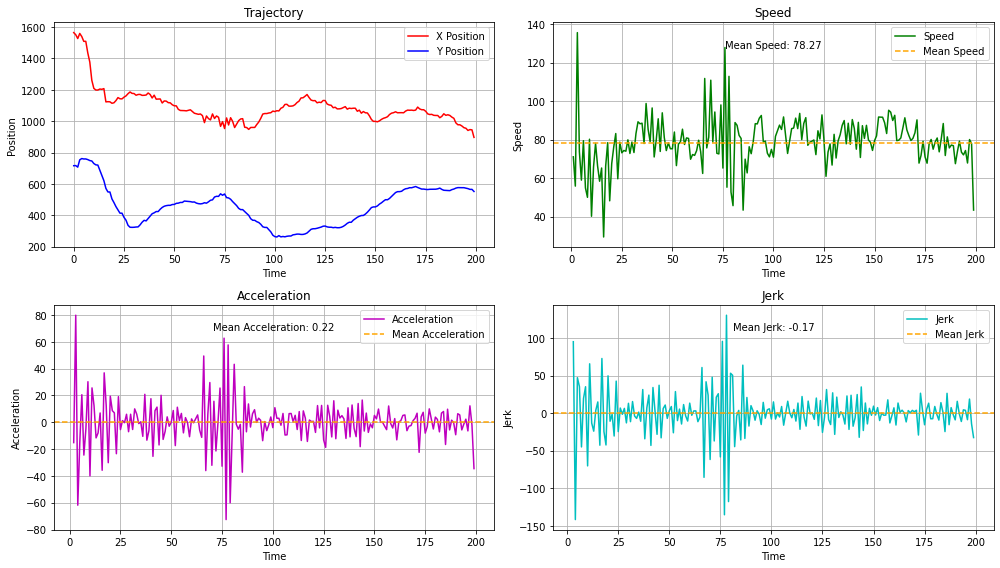

Mean Speed: 78.27234965639262
Mean Acceleration: 0.21680058753991432
Mean Jerk: -0.1729637970116849


In [60]:
import numpy as np
import matplotlib.pyplot as plt

def compute_trajectory(labeled_frames, chosen_label):
    trajectory = []
    for frame in labeled_frames:
        positions = np.argwhere(frame == chosen_label)
        if positions.size > 0:
            mean_position = np.mean(positions, axis=0)
            trajectory.append(mean_position)
        else:
            trajectory.append([np.nan, np.nan])  # Handle frames without the chosen label
    return np.array(trajectory)

def compute_magnitude(vectors):
    return np.linalg.norm(vectors, axis=1)

def compute_speed(trajectory):
    valid_indices = ~np.isnan(trajectory).any(axis=1)
    valid_trajectory = trajectory[valid_indices]
    speed = np.diff(valid_trajectory, axis=0)+56
    speed_magnitude = compute_magnitude(speed)
    return valid_indices, np.concatenate([[0], speed_magnitude])  # 0 for initial point

def compute_acceleration(speed):
    acceleration = np.diff(speed)
    return np.concatenate([[0], acceleration])  # 0 for initial point

def compute_jerk(acceleration):
    jerk = np.diff(acceleration)
    return np.concatenate([[0], jerk])  # 0 for initial point

def compute_mean(values):
    valid_values = values[~np.isnan(values)]
    if valid_values.size == 0:
        return np.nan
    return np.mean(valid_values)

def plot_results(time, trajectory, speed, acceleration, jerk, mean_speed, mean_acceleration, mean_jerk):
    plt.figure(figsize=(14, 8))

    plt.subplot(2, 2, 1)
    plt.plot(time, trajectory[:, 0], 'r-', label='X Position')
    plt.plot(time, trajectory[:, 1], 'b-', label='Y Position')
    plt.title('Trajectory')
    plt.xlabel('Time')
    plt.ylabel('Position')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 2)
    plt.plot(time[1:], speed[1:], 'g-', label='Speed')  # Skip the initial 0 value
    plt.axhline(mean_speed, color='orange', linestyle='--', label='Mean Speed')
    plt.title('Speed')
    plt.xlabel('Time')
    plt.ylabel('Speed')
    plt.legend()
    plt.grid(True)
    plt.text(0.5, 0.9, f'Mean Speed: {mean_speed:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

    plt.subplot(2, 2, 3)
    plt.plot(time[2:], acceleration[2:], 'm-', label='Acceleration')  # Skip the initial 0 values
    plt.axhline(mean_acceleration, color='orange', linestyle='--', label='Mean Acceleration')
    plt.title('Acceleration')
    plt.xlabel('Time')
    plt.ylabel('Acceleration')
    plt.legend()
    plt.grid(True)
    plt.text(0.5, 0.9, f'Mean Acceleration: {mean_acceleration:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

    plt.subplot(2, 2, 4)
    plt.plot(time[3:], jerk[3:], 'c-', label='Jerk')  # Skip the initial 0 values
    plt.axhline(mean_jerk, color='orange', linestyle='--', label='Mean Jerk')
    plt.title('Jerk')
    plt.xlabel('Time')
    plt.ylabel('Jerk')
    plt.legend()
    plt.grid(True)
    plt.text(0.5, 0.9, f'Mean Jerk: {mean_jerk:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()

    print(f"Mean Speed: {mean_speed}")
    print(f"Mean Acceleration: {mean_acceleration}")
    print(f"Mean Jerk: {mean_jerk}")

# Example usage
labeled_frames = [
    np.random.randint(0, 3, size=(10, 10)),  # Random 10x10 frame with labels 0, 1, 2
    np.random.randint(0, 3, size=(10, 10)),  # Another random 10x10 frame
    np.random.randint(0, 3, size=(10, 10)),  # Another random 10x10 frame
    np.random.randint(0, 3, size=(10, 10)),  # Another random 10x10 frame
    np.random.randint(0, 3, size=(10, 10))   # Another random 10x10 frame
]

chosen_label = 8

trajectory = compute_trajectory(stabilized_frames_matrices_World_Record_Speed, chosen_label)
valid_indices, speed = compute_speed(trajectory)
acceleration = compute_acceleration(speed)
jerk = compute_jerk(acceleration)

mean_speed = compute_mean(speed)
mean_acceleration = compute_mean(acceleration)
mean_jerk = compute_mean(jerk)

time = np.arange(len(trajectory))[valid_indices]

plot_results(time, trajectory[valid_indices], speed, acceleration, jerk, mean_speed, mean_acceleration, mean_jerk)
#----------------------------------------------------------------------------------

In [ ]:
# Dans l'ordre alternance loser/winner
# Mean Speed: 163.8892533972109, 259.04846396885796
# Mean Acceleration: 0.611518489814106, 1.4641877209324847
# Mean Jerk: -0.13, 0.30, -0.19, 0.44, -0.03, 0.35,
# 0.39, 0.22, -0.26, 0.22, -0.17



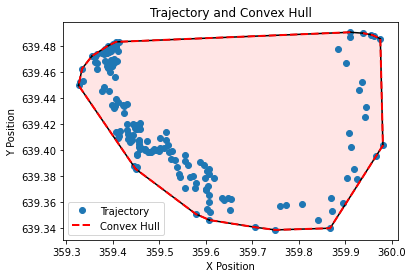

In [74]:
# Convex hull, useful for geometric index of entropy

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# Assuming `trajectory` is a Nx2 numpy array with each row representing [x, y] coordinates of the trajectory
trajectory = positions

# Calculate the convex hull
hull = ConvexHull(trajectory)

# Plot the trajectory and its convex hull
plt.plot(trajectory[:, 0], trajectory[:, 1], 'o', label='Trajectory')
for simplex in hull.simplices:
    plt.plot(trajectory[simplex, 0], trajectory[simplex, 1], 'k-')
plt.plot(trajectory[hull.vertices, 0], trajectory[hull.vertices, 1], 'r--', lw=2, label='Convex Hull')
plt.fill(trajectory[hull.vertices, 0], trajectory[hull.vertices, 1], 'r', alpha=0.1)

plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Trajectory and Convex Hull')
plt.legend()
plt.show()

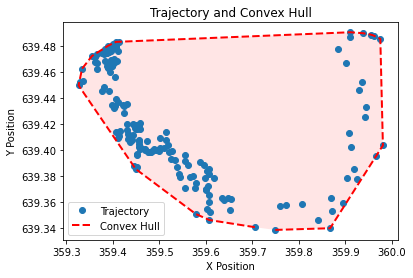

In [76]:
# Better convex hull, useful for geometric index of entropy

import numpy as np
import matplotlib.pyplot as plt

def polar_angle(p0, p1=None):
    if p1 is None:
        p1 = anchor
    y_span = p0[1] - p1[1]
    x_span = p0[0] - p1[0]
    return np.arctan2(y_span, x_span)

def distance(p0, p1=None):
    if p1 is None:
        p1 = anchor
    y_span = p0[1] - p1[1]
    x_span = p0[0] - p1[0]
    return y_span**2 + x_span**2

def det(p1, p2, p3):
    return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0])

def graham_scan(points):
    global anchor
    points = sorted(points, key=lambda p: (p[1], p[0]))
    anchor = points[0]
    sorted_points = sorted(points[1:], key=lambda p: (polar_angle(p), distance(p)))
    sorted_points.insert(0, anchor)
    
    hull = [sorted_points[0], sorted_points[1]]
    for s in sorted_points[2:]:
        while len(hull) > 1 and det(hull[-2], hull[-1], s) <= 0:
            hull.pop()
        hull.append(s)
    return hull

# Example trajectory
trajectory = positions

# Calculate the convex hull
convex_hull = graham_scan(trajectory)

# Plot the trajectory and its convex hull
plt.plot(trajectory[:, 0], trajectory[:, 1], 'o', label='Trajectory')
hull_points = np.array(convex_hull)
plt.plot(hull_points[:, 0], hull_points[:, 1], 'r--', lw=2, label='Convex Hull')
plt.fill(hull_points[:, 0], hull_points[:, 1], 'r', alpha=0.1)

plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Trajectory and Convex Hull')
plt.legend()
plt.show()

In [77]:
# Geometric index of entropy

import numpy as np
import math

def geometric_index_of_entropy(trajectory):
    # Convert trajectory to numpy array for easier manipulation
    trajectory = np.array(trajectory)
    
    # Calculate pairwise distances
    distances = np.linalg.norm(trajectory[:, np.newaxis] - trajectory, axis=2)
    
    # Calculate the average distance
    avg_distance = np.mean(distances)
    
    # Calculate the entropy
    entropy = -np.sum((distances / avg_distance) * np.log(distances / avg_distance + 1e-10)) / len(trajectory)
    
    return entropy

# Example trajectory
trajectory = positions

# Calculate the geometric index of entropy
entropy = geometric_index_of_entropy(trajectory)
print(f'Geometric Index of Entropy: {entropy:.4f}')

Geometric Index of Entropy: -65.1898


In [ ]:
# Level of climbing using graphs



In [ ]:
# PART 3

In [61]:
# kNN
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
-0.13, 0.30, -0.19, 0.44, -0.03, 0.35
# Example jerk data (replace this with your actual data)
# Each row represents [jerk_feature_1, jerk_feature_2, ..., jerk_feature_n, label]
data = np.array([
    [-0,13, -0,19, -0.03],   # Example player who won
    [0.3, 0.44, 0.35],   # Example player who lost
    # Add more data points...
])

# Split the data into features and labels
X = data[:, :-1]  # All rows, all columns except the last
y = data[:, -1]   # All rows, only the last column

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the kNN classifier
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Predict for a new player (example)
new_player_jerk = np.array([[0.39, 0.22, -0.26, 0.22, 0.17]])  # Replace with actual data
new_player_jerk = scaler.transform(new_player_jerk)
prediction = knn.predict(new_player_jerk)
print(f'Prediction for the new player (1=win, 0=lose): {prediction[0]}')

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_10008\2125688072.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [68]:
import numpy as np

def calculate_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

def k_nearest_neighbors(data, x_test, k):
    # Step 1: Check if the element exists in the training set
    for point in data:
        if np.array_equal(point[:-1], x_test):
            return point[-1]
    
    # Step 2: Calculate distances between x_test and all elements in the training set
    distances = []
    for point in data:
        distance = calculate_distance(point[:-1], x_test)
        distances.append((distance, point[-1]))
    
    # Step 3: Sort distances and select the k nearest neighbors
    distances.sort(key=lambda x: x[0])
    k_nearest = distances[:k]
    
    # Step 4: Collect the classes of the k nearest neighbors
    k_nearest_labels = [label for _, label in k_nearest]
    
    # Step 5: Determine and return the majority class
    class_count = {}
    for label in k_nearest_labels:
        if label in class_count:
            class_count[label] += 1
        else:
            class_count[label] = 1
    
    # Find the class with the highest count
    majority_class = max(class_count, key=class_count.get)
    return majority_class

# Example usage
if __name__ == "__main__":
    # Sample training data (features and labels combined)
    data = np.array([
    [-0.13, -0.19, -0.03],   # Example player who won
    [0.3, 0.44, 0.35]   # Example player who lost
    # Add more data points...
])
    # New data points for prediction
    X_test = np.array([
        0.39, 0.22, -0.26, 0.22, 0.17
    ])
    
    k = 5  # Number of neighbors to consider
    
    # Predict the classes for new data points
    predictions = []
    for x in X_test:
        prediction = k_nearest_neighbors(data, x, k)
        predictions.append(prediction)
    
    print(predictions)  # Output the predicted classes


[0.35, 0.35, -0.03, 0.35, 0.35]


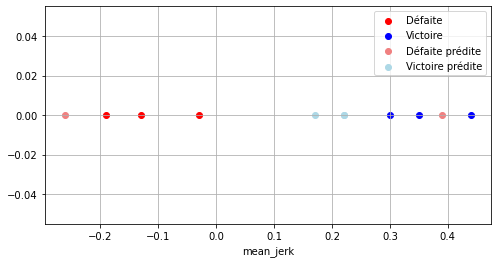

In [75]:
import matplotlib.pyplot as plt

# Données
rouge = [-0.13, -0.19, -0.03]
bleu = [0.3, 0.44, 0.35]
rouge_clair = [0.39, -0.26]
bleu_clair = [0.22, 0.22, 0.17]

# Dessiner le nuage de points
plt.figure(figsize=(8, 4))

plt.scatter(rouge, [0]*len(rouge), color='red', label='Défaite')
plt.scatter(bleu, [0]*len(bleu), color='blue', label='Victoire')
plt.scatter(rouge_clair, [0]*len(rouge_clair), color='lightcoral', label='Défaite prédite')
plt.scatter(bleu_clair, [0]*len(bleu_clair), color='lightblue', label='Victoire prédite')

plt.xlabel('mean_jerk')
plt.legend()
plt.grid(True)
plt.show()
